# Statistische Modelle - Beispiel 5: Decision Tree

## Einlesen der notwendigen Bibliotheken


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn import datasets, neighbors
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# dieser Datensatz ist so grundlegend, den kann man direkt einladen lassen
from sklearn.datasets import load_iris


In [2]:
# importieren des IRIS-Datensatzes und festlegen den Variablen
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

## Metadaten:
Der berühmte Iris-Datensatz:
Der Datensatz besteht aus 50 Messungen von drei Arten der Pflanze Iris (Iris setosa, Iris virginica and Iris versicolor). Es wurden jeweils die 4 Merkmale vermessen: Länge und Breite der Kelchblätter sowie Länge und Breite der Kronblätter (jeweils in cm). Basierend auf der Kombination der vier Grundmerkmale entwickelte Fischer (1936) eine Möglichkeit, diese Arten voneinander zu unterscheiden. Dieser Datensatz ist ein grundlegender Testdatensatz für verschiedene ML-Anwendungen.
Quellen: 
* R. A. Fisher (1936). "The use of multiple measurements in taxonomic problems". Annals of Eugenics. 7 (2): 179–188. doi:10.1111/j.1469-1809.1936.tb02137.x. hdl:2440/15227
* https://en.wikipedia.org/wiki/Iris_flower_data_set

In [16]:
# Modell 'Decision Tree' anwenden
tree_clf = DecisionTreeClassifier(criterion = 'gini', max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

## Was ist der Gini-Index?

* Merkmal zur Beschreibung der Reinheit einer Klasse, Kennzahl für die Ungleichverteilung
* gibt die Unreinheit einer Menge von Trainingsobjekten in Bezug auf ihre Klassenzugehörigkeit an
* liegt zwischen 0 und 1
* kleiner Gini-Index bedeutet geringe Unreinheit
* andere Kriterien: 'entropy', 'log_loss'


[Text(0.4, 0.8333333333333334, 'x[0] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'x[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

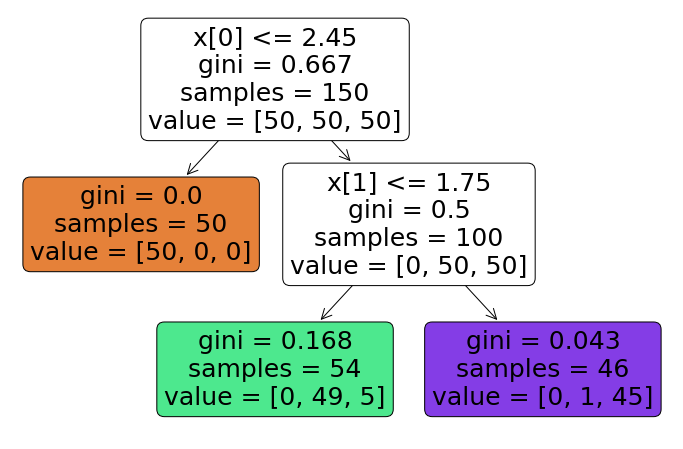

In [17]:
# Baumstruktur anzeigen
plt.figure(figsize=(12,8))
tree.plot_tree(tree_clf.fit(X, y), filled=True, rounded = True)

## Visualisieren der Ergebnisse

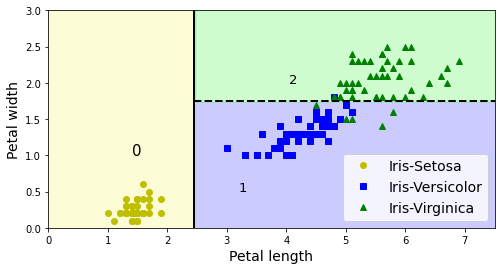

In [18]:
plt.figure(figsize=(8, 4))
axes=[0, 7.5, 0, 3]
x1s = np.linspace(axes[0], axes[1], 100)
x2s = np.linspace(axes[2], axes[3], 100)
x1, x2 = np.meshgrid(x1s, x2s)
X_new = np.c_[x1.ravel(), x2.ravel()]
y_pred = tree_clf.predict(X_new).reshape(x1.shape)
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

# Darstellen der Klassen-Rechtecke sowie der Datenpunkte
plt.contourf(x1, x2, y_pred, alpha=0.5, cmap=custom_cmap)
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
plt.axis(axes)

plt.text(1.40, 1.0, "0", fontsize=15)
plt.text(3.2, 0.5, "1", fontsize=13)
plt.text(4.05, 2.0, "2", fontsize=13)

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)

plt.legend(loc="lower right", fontsize=14)

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)

plt.show()

## Modellgüte evaluieren

In [19]:
from sklearn.metrics import accuracy_score

y_pred=tree_clf.predict(X)
print('Erreichte Modellgenauigkeit für den Trainingsadtensatz - Kriterium gini index: accuracy = {0:0.4f}'. format(accuracy_score(y, y_pred)))

Erreichte Modellgenauigkeit für den Trainingsadtensatz - Kriterium gini index: accuracy = 0.9600


In [20]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y,y_pred)
pd.crosstab(y, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,All
True,,,,
0,50,0,0,50
1,0,49,1,50
2,0,5,45,50
All,50,54,46,150


## Vergleich der Modelle

* kNN und Decision Tree liefern vergleichbare Ergebnisse bezüglich Klässifizierung und Modellgenauigkeit